In [5]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd

/opt/homebrew/Caskroom/miniconda/base/envs/fnn/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
text = '''
Proof The Mainstream Media Is Manipulating The Election By Taking Bill Clinton Out Of Context,"I woke up this morning to find a variation of this headline splashed all over my news feed:

Bill Clinton: ‘Natural’ For Foundation Donors to Seek Favors

Here’s Google:

Naturally, my reaction was “oh, s**t, what did Bill Clinton do to damage his wife’s campaign now?”

Of course, the headline sounds really, really awful. It plays right into the idea that the Clinton Foundation is all about pay to play, just like Donald Trump has been saying all along. Unfortunately, it takes reading beyond the headlines, which is something most people don’t do, to find out the real story – and the real story is that there is no pay to play.

“It was natural for people who’ve been our political allies and personal friends to call and ask for things. And I trusted the State Department wouldn’t do anything they shouldn’t do,” Clinton told NPR in an interview that aired Monday morning. Source: CNN

In other words, people can ask for favors, but that certainly doesn’t mean they’ll get them. Leaked emails have shown that some Clinton Foundation donors have gotten meetings with Clinton and that others were turned down. There is zero evidence of pay to play. In other words, people might have asked for favors, but there’s no evidence they got them.

Now, let’s talk about the foundation the media doesn’t like to mention, the Trump Foundation. Trump hasn’t given to his own foundation since 2008. He does collect money from others, though, and gives it in his name. He also takes from the charity and allegedly buys things like oil paintings and football helmets, all for himself, but out of charity money.

New York Attorney General Eric Schneiderman said in a September 13 CNN interview that his office is investigating Trump’s charitable foundation over concerns that it “engaged in some impropriety” as related to New York charity laws. The investigation launched amid reports from The Washington Post that Trump spent money from his charity on items meant to benefit himself, such as a $20,000 oil painting of himself and a $12,000 autographed football helmet, and also recycled others’ contributions “to make them appear to have come from him” although he “hasn’t given to the foundation since 2008.” Source: Media Matters

Media Matters goes on to talk about the double standard and about how clearly the mainstream media is trying to promote Trump at the cost of Clinton’s candidacy:

Journalists have been criticized for the “double standard” in the ways they cover Trump and Democratic presidential nominee Hillary Clinton. Earlier this month, cable news programs devoted 13 times more coverage to Clinton’s pneumonia diagnosis as The Washington Post’s reporting about the Trump Foundation. This week, both the Trump Foundation and Trump Organization stories were given short shrift by the broadcast news programs in favor of coverage of Donald Trump’s Dr. Oz stunt.

All of this biased coverage is hurting Clinton and helping Trump. Trump has seen major gains over the last few weeks, largely because the media covers every minor Clinton “scandal” (if you call getting sick a “scandal”) while ignoring every scandal in Trump’s closet, and trust me, there are a lot.
'''

In [7]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [8]:
encoded_text = tokenizer(text[:512], return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [9]:
scores

array([0.8648976 , 0.1241695 , 0.01093288], dtype=float32)

In [10]:
def score_news_sentiment(text):
    encoded_text = tokenizer(text[:512], return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

In [11]:
real = '''
,Another Terrorist Attack in NYC…Why Are we STILL Being Politically Correct – Eagle Rising,"On Saturday, September 17 at 8:30 pm EST, an explosion rocked West 23 Street in Manhattan, in the neighborhood commonly referred to as Chelsea, injuring 29 people, smashing windows and initiating street closures. There were no fatalities. Officials maintain that a homemade bomb, which had been placed in a dumpster, created the explosion. The explosive device was removed by the police at 2:25 am and was sent to a lab in Quantico, Virginia for analysis. A second device, which has been described as a “pressure cooker” device similar to the device used for the Boston Marathon bombing in 2013, was found on West 27th Street between the Avenues of the Americas and Seventh Avenue. By Sunday morning, all 29 people had been released from the hospital. The Chelsea incident came on the heels of an incident Saturday morning in Seaside Heights, New Jersey where a bomb exploded in a trash can along a route where thousands of runners were present to run a 5K Marine Corps charity race. There were no casualties. By Sunday afternoon, law enforcement had learned that the NY and NJ explosives were traced to the same person.

Given that we are now living in a world where acts of terrorism are increasingly more prevalent, when a bomb goes off, our first thought usually goes to the possibility of terrorism. After all, in the last year alone, we have had several significant incidents with a massive number of casualties and injuries in Paris, San Bernardino California, Orlando Florida and Nice, to name a few. And of course, last week we remembered the 15th anniversary of the September 11, 2001 attacks where close to 3,000 people were killed at the hands of terrorists. However, we also live in a world where political correctness is the order of the day and the fear of being labeled a racist supersedes our natural instincts towards self-preservation which, of course, includes identifying the evil-doers. Isn’t that how crimes are solved? Law enforcement tries to identify and locate the perpetrators of the crime or the “bad guys.” Unfortunately, our leadership – who ostensibly wants to protect us – finds their hands and their tongues tied. They are not allowed to be specific about their potential hypotheses for fear of offending anyone.

New York City Mayor Bill de Blasio – who famously ended “stop-and-frisk” profiling in his city – was extremely cautious when making his first remarks following the Chelsea neighborhood explosion. “There is no specific and credible threat to New York City from any terror organization,” de Blasio said late Saturday at the news conference. “We believe at this point in this time this was an intentional act. I want to assure all New Yorkers that the NYPD and … agencies are at full alert”, he said. Isn’t “an intentional act” terrorism? We may not know whether it is from an international terrorist group such as ISIS, or a homegrown terrorist organization or a deranged individual or group of individuals. It is still terrorism. It is not an accident. James O’Neill, the New York City Police Commissioner had already ruled out the possibility that the explosion was caused by a natural gas leak at the time the Mayor made his comments. New York’s Governor Andrew Cuomo was a little more direct than de Blasio saying that there was no evidence of international terrorism and that no specific groups had claimed responsibility. However, he did say that it is a question of how the word “terrorism” is defined. “A bomb exploding in New York is obviously an act of terrorism.” Cuomo hit the nail on the head, but why did need to clarify and caveat before making his “obvious” assessment?

The two candidates for president Hillary Clinton and Donald Trump also weighed in on the Chelsea explosion. Clinton was very generic in her response saying that “we need to do everything we can to support our first responders – also to pray for the victims” and that “we need to let this investigation unfold.” Trump was more direct. “I must tell you that just before I got off the plane a bomb went off in New York and nobody knows what’s going on,” he said. “But boy we are living in a time—we better get very tough folks. We better get very, very tough. It’s a terrible thing that’s going on in our world, in our country and we are going to get tough and smart and vigilant.”

Unfortunately, an incident like the Chelsea explosion reminds us how vulnerable our country is particularly in venues defined as “soft targets.” Now more than ever, America needs strong leadership which is laser-focused on protecting her citizens from terrorist attacks of all genres and is not afraid of being politically incorrect.

The views expressed in this opinion article are solely those of their author and are not necessarily either shared or endorsed by EagleRising.com",http://eaglerising.com/36942/another-terrorist-attack-in-nyc-why-are-we-still-being-politically-correct/,http://eaglerising.com/wp-content/uploads/2016/09/terrorism-2.jpg,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},,"http://constitution.com/wp-content/uploads/2017/08/confederatemonument_poll_pop.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46772-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/2016/03/eagle-rising-logo3-1.png,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46729-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46764-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46731-featured-300x130.jpg,http://pixel.quantserve.com/pixel/p-52ePUfP6_NxQ_.gif,http://0.gravatar.com/avatar/9b4601287436c60e1c7c5b65d725151f?s=112&d=mm&r=g,http://b.scorecardresearch.com/p?c1=2&c2=22315475&cv=2.0&cj=1,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46784-featured-300x130.png,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/2016/09/terrorism-2-800x300.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/2016/09/coup-375x195.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/2017/04/crtv_300x600_1.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46774-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/2016/09/superstar-375x195.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46763-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46612-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46761-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46642-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46735-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46750-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46755-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46752-featured-300x130.png,http://eaglerising.com/wp-content/uploads/2016/09/terrorism-2.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46743-featured-300x130.jpg,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46712-featured-300x130.jpg,http://0.gravatar.com/avatar/9b4601287436c60e1c7c5b65d725151f?s=100&d=mm&r=g,http://2lv0hm3wvpix464wwy2zh7d1.wpengine.netdna-cdn.com/wp-content/uploads/wordpress-popular-posts/46757-featured-300x130.png",http://eaglerising.com/36942/another-terrorist-attack-in-nyc-why-are-we-still-being-politically-correct/,"{""description"": ""\u201cWe believe at this point in this time this was an intentional act,\"" de Blasio said. Isn\u2019t \u201can intentional act\u201d terrorism?"", ""og"": {""site_name"": ""Eagle Rising"", ""description"": ""\u201cWe believe at this point in this time this was an intentional act,\"" de Blasio said. Isn\u2019t \u201can intentional act\u201d terrorism?"", ""title"": ""Another Terrorist Attack in NYC...Why Are we STILL Being Politically Correct"", ""locale"": ""en_US"", ""image"": ""http://eaglerising.com/wp-content/uploads/2016/09/terrorism-2.jpg"", ""updated_time"": ""2016-09-22T10:49:05+00:00"", ""url"": ""http://eaglerising.com/36942/another-terrorist-attack-in-nyc-why-are-we-still-being-politically-correct/"", ""type"": ""article""}, ""robots"": ""noimageindex"", ""fb"": {""app_id"": 256195528075351, ""pages"": 135665053303678}, ""article"": {""section"": ""Political Correctness"", ""tag"": ""terrorism"", ""published_time"": ""2016-09-22T07:10:30+00:00"", ""modified_time"": ""2016-09-22T10:49:05+00:00""}, ""viewport"": ""initial-scale=1,maximum-scale=1,user-scalable=no"", ""googlebot"": ""noimageindex""}"
Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' in Charlotte Protests","Less than a day after protests over the police killing of an African-American man turned violent in North Carolina, Republican presidential nominee Donald Trump placed some of the blame for the turmoil on the impact of drugs.

""If you're not aware, drugs are a very, very big factor in what you're watching on television at night,"" said Trump in a speech to the Shale Insight 2016 Conference in Pittsburgh today.

On Wednesday night, Charlotte experienced its second night of protests after the death of Keith Lamont Scott on Tuesday afternoon. Officers in riot gear confronted demonstrators in a downtown commercial area and employed tear gas to control crowds. One person is in critical condition after suffering an apparent gunshot wound.

The Republican nominee condemned the violence, calling for unity.

""Our country looks bad to the world, especially when we are supposed to be the world's leader. How can we lead when we can't even control our own cities? We honor and recognize the right of all Americans to peacefully assemble, protest and demonstrate, but there is no right to engage in violent disruption or to threaten the public safety and peace of others.""

He continued to praise law enforcement officers, citing the challenges they face and calling for better training.

""It's tough being a police officer,"" Trump said. ""Police are entrusted with immense responsibility, and we must do everything we can to ensure that they are properly trained, that they respect all members of the public and that any wrongdoing is always — and it will be by them — vigorously addressed.""

But aside from that one reference, amid his heavy-handed praise for law enforcement and condemnation of protesters, Trump never acknowledged any pattern of violence against African-Americans at the hands of police, which is precisely why so many protesters say they have taken to the streets. They cite the shooting deaths of dozens of other black Americans by police as cause to protest a system they say is dangerous and discriminatory and fails to prosecute far too many officers who kill African-Americans, in many instances unarmed.

Trump in recent days has appealed to black Americans, asking them what they have to lose by voting for him, even as he paints an exceptionally grim portrait of black poverty and crime.

During a rally earlier this week in North Carolina, Trump said, ""We're going to rebuild our inner cities because our African-American communities are absolutely in the worst shape they've ever been in before. Ever, ever, ever,""

Many African-Americans have bristled at that broad assertion. While many inner cities are plagued by crime and poverty, according to census data from 2015, 52.9 percent of black Americans age 25 or older hold some sort of college degree. A Pew report released in December shows that black adults experienced the largest income increase from 1971 to 2015 and were the only racial group to see a decrease in the percentage of low-income earners. And according to the Census Bureau, almost 73 percent of black Americans do not live in poverty.

Trump, in an effort to reach out to the black community, visited Cleveland earlier this week, appearing at a black church. And during a town hall on the Fox News Channel Wednesday night, he was asked about the threat of violence.

""I would do stop and frisk. I think you have to,"" said Trump. ""We did it in New York. It worked incredibly well. And you have to be proactive and, you know, you really help people sort of change their mind automatically.""

But this morning in an interview on ""Fox & Friends"" he stepped back from the statement, claiming he was referring to a strategy only for Chicago.

In Pittsburgh, Trump delineated a difference between what he called the ""violent disruptor"" and the rest of the black community. He said it was the country""s job ""to make life more comfortable for the African-American parent trying to raise their kids in peace, to walk their children to school and to get their children great educations.""",http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald_trump_2_jt_160826_16x9_992.jpg,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,,,"http://www.googleadservices.com/pagead/conversion/1005826543/?value=0&label=1GPKCOHYjwMQ7-PO3wM&guid=ON&script=0,http://a.abcnews.com/images/Politics/AP_donald_trump_2_jt_160826_12x5_992.jpg,http://secure-us.imrworldwide.com/cgi-bin/m?ci=us-704476h&cg=0&cc=1&ts=noscript,http://a.abcnews.com/images/Politics/AP_donald_trump_2_jt_160826_16x9_992.jpg",http://abcnews.go.com/Politics/donald-trump-drugs-big-factor-charlotte-protests/story?id=42282437,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big Factor' in Charlotte Protests"", ""description"": ""The police-involved shooting of a black man has sparked protests in Charlotte."", ""copyright"": ""Copyright (c) 2017 ABC News Internet Ventures"", ""author"": ""ABC News"", ""og"": {""site_name"": ""ABC News"", ""description"": ""The police-involved shooting of a black man has sparked protests in Charlotte."", ""title"": ""Trump: Drugs a 'Very, Very Big Factor' in Charlotte Protests"", ""url"": ""http://abcnews.go.com/Politics/donald-trump-drugs-big-factor-charlotte-protests/story?id=42282437"", ""image"": ""http://a.abcnews.com/images/Politics/AP_donald_trump_2_jt_160826_16x9_992.jpg"", ""type"": ""article""}, ""twitter"": {""description"": ""The police-involved shooting of a black man has sparked protests in Charlotte."", ""title"": ""Trump: Drugs a 'Very, Very Big Factor' in Charlotte Protests"", ""url"": ""http://abcnews.go.com/Politics/donald-trump-drugs-big-factor-charlotte-protests/story?id=42282437"", ""image"": ""http://a.abcnews.com/images/Politics/AP_donald_trump_2_jt_160826_16x9_992.jpg"", ""creator"": ""@adam_kels"", ""site"": ""@ABC"", ""app"": {""url"": {""ipad"": ""abcnewsipad://link/story,42282437"", ""iphone"": ""abcnewsiphone://link/story,42282437"", ""googleplay"": ""android-app://com.abc.abcnews/abcnews/abcnews.go.com/Politics/donald-trump-drugs-big-factor-charlotte-protests/story?id=42282437""}, ""name"": {""ipad"": ""ABC News"", ""iphone"": ""ABC News"", ""googleplay"": ""ABC News""}, ""id"": {""ipad"": 306934135, ""iphone"": 300255638, ""googleplay"": ""com.abc.abcnews""}}, ""card"": ""summary_large_image""}, ""robots"": ""index, follow"", ""DC.date.issued"": ""2016-09-22"", ""al"": {""ipad"": {""url"": ""abcnewsipad://link/story,42282437"", ""app_store_id"": 380520716, ""app_name"": ""ABC News for iPad""}, ""web"": {""url"": ""http://abcnews.go.com/Politics/donald-trump-drugs-big-factor-charlotte-protests/story?id=42282437""}, ""android"": {""url"": ""android-app://com.abc.abcnews/abcnews/abcnews.go.com/Politics/donald-trump-drugs-big-factor-charlotte-protests/story?id=42282437"", ""app_name"": ""ABC News Breaking Latest News"", ""package"": ""com.abc.abcnews""}, ""iphone"": {""url"": ""abcnewsiphone://link/story,42282437"", ""app_store_id"": 300255638, ""app_name"": ""ABC News - Breaking US & World News""}}, ""Date"": ""2016-09-22"", ""fb"": {""admins"": 704409894, ""app_id"": 4942312939, ""pages"": 55845270277}, ""Last-Modified"": ""2016-09-22 14:33:00"", ""keywords"": ""Donald Trump, Keith Lamont Scott, Protests, Election 2016, Charlotte, Pittsburgh, politics news, election news, political news, political news articles"", ""viewport"": ""initial-scale=1.0, maximum-scale=1.0, user-scalable=no"", ""news_keywords"": ""Donald Trump, Keith Lamont Scott, Protests, Election 2016, Charlotte, Pittsburgh""}"
Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Security In America…’ [VIDEO]","Obama To UN: ‘Giving Up Liberty, Enhances Security In America…’ [VIDEO]

Freedom is the bedrock that this nation was built upon. The problem is, liberals hate freedom. Oh, sure — they pay lip service to its importance, but ultimately, they want people to be subservient to a liberal-controlled government. They may not want a tyrannical king, but a tyrannical government of socialist-loving politicians pushing government-controlled everything is A-OK with them. They can’t ever say this out loud, though. Which makes the speech Obama just gave to the United Nations rather surprising. Obama actually admitted that he thinks it’s necessary for the United States to give up a little liberty… you know, for “safety”.

Tuesday, Obama spoke to the United Nations General Assembly. “We can only realize the promise of this institution’s founding to replace the ravages of war with cooperation if powerful nations, like my own, accept constraints,” he said. “Sometimes I am criticized in my own country for professing a belief in international norms and multilateral institutions. But I am convinced in the long run, giving up some freedom of action, not giving up our ability to protect ourselves or pursue our core interests, but binding ourselves to the international rules over the long-term enhances our security.”

× 101 Things All Young Adults Should Know by Sir John Hawkins John Hawkins's book 101 Things All Young Adults Should Know is filled with lessons that newly minted adults need in order to get the most out of life. Gleaned from a lifetime of trial, error, and writing it down, Hawkins provides advice everyone can benefit from in short, digestible chapters. Buy Now

So evidently, Obama believes that we should relinquish more of our freedom and sovereignty so that the international community can rule over us. How this will make the country safer, he didn’t explain. But safety relies on us bringing more Muslim refugees into the United States. “Ultimately our world will be more secure if we are prepared to help those in need and the nations who are carrying the largest burden with respect to accommodating these refugees,” Obama said.

Obama may want to take a look at how Germany is doing. Accepting tons of refugees without screening them first has certainly not made their country safer — it’s made it more dangerous. And right here in the United States, we have had multiple terrorist attacks over the last year.

How allowing over 110,000 Muslim refugees with no vetting whatsoever into our country will keep us safe is not something that Obama can actually explain, because it’s a completely ludicrous idea. And turning the United States into a country that has to answer to the United Nations before we act on anything doesn’t make us safer, either. It’s a typical liberal idea: something that is nonsensical and useless, yet will weaken the country and strip Americans of their constitutionally-protected rights. But hey, who needs freedom, right? Obama has an agenda to push.",http://rightwingnews.com/barack-obama/obama-un-giving-liberty-enhances-security-america/,http://rightwingnews.com/wp-content/uploads/2016/09/obama-un.jpg,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,"http://rightwingnews.com/wp-content/uploads/2016/09/obama-un.jpg,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343883-featured-90x90.png,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343898-featured-90x90.jpg,http://pixel.quantserve.com/pixel/p-RS38vHsezmL8w.gif,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343804-featured-214x123.jpg,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343804-featured-90x90.jpg,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343898-featured-214x123.jpg,https://www.facebook.com/tr?ev=6026286623931&cd[value]=0.00&cd[currency]=USD&noscript=1,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343798-featured-90x90.jpg,http://rightwingnews.com/wp-content/uploads/2016/09/obama-un-890x395_c.jpg,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343798-featured-214x123.jpg,http://www.rightwingnews.com/wp-content/uploads/2014/08/rightwingnews_logo.png,http://rightwingnews.com/wp-content/themes/rightwingnews-theme/images/loading.gif,http://rightwingnews.com/wp-content/plugins/wpdev-content-ad/assets/book-ad.jpg,http://2.gravatar.com/avatar/8b602f8210f1a7d948ca1c0dcab11fad?s=96&d=mm&r=g,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343754-featured-90x90.jpg,http://2.gravatar.com/avatar/8b602f8210f1a7d948ca1c0dcab11fad?s=32&d=mm&r=g,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343754-featured-214x123.jpg,http://rightwingnews.com/wp-content/uploads/2016/09/ZObama.png,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343814-featured-214x123.jpg,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343883-featured-214x123.png,http://rightwingnews.com/wp-content/uploads/wordpress-popular-posts/343814-featured-90x90.jpg",http://rightwingnews.com/barack-obama/obama-un-giving-liberty-enhances-security-america/,"{""googlebot"": ""noimageindex"", ""og"": {""site_name"": ""John Hawkins' Right Wing News"", ""description"": ""Freedom is the bedrock that this nation was built upon. The problem is, liberals hate freedom. Oh, sure \u2014 they pay lip service to its importance, but ultimately, they want"", ""title"": ""Obama To UN: 'Giving Up Liberty, Enhances Security In America...' [VIDEO] | John Hawkins' Right Wing News"", ""locale"": ""en_US"", ""image"": {""width"": 640, ""identifier"": ""http://rightwingnews.com/wp-content/uploads/2016/09/obama-un.jpg"", ""height"": 480}, ""updated_time"": ""2016-09-21T17:46:06-04:00"", ""url"": ""http://rightwingnews.com/barack-obama/obama-un-giving-liberty-enhances-security-america/"", ""type"": ""article""}, ""referrer"": ""always"", ""robots"": ""noimageindex"", ""fb"": {""app_id"": 1631890973779575, ""pages"": 389658314427637}, ""article"": {""section"": ""Barack Obama"", ""published_time"": ""2016-09-21T12:40:44-04:00"", ""modified_time"": ""2016-09-21T17:46:06-04:00""}, ""google-site-verification"": ""SkBwg36QfD-9JmsE5roZWtBuTvXCuBAahBo8MiQVSEk"", ""viewport"": ""width=device-width, initial-scale=1""}"
Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over How the Economy Works,"Getty Images Wealth Of Nations Trump vs. Clinton: A Fundamental Clash over How the Economy Works He sees it as zero-sum. She believes all boats rise together. Hillary is right, but a lot of people are buying into Trump’s vision.

As he made clear once again in Monday night’s debate, Donald Trump sees the world in zero-sum terms—when one person or one country wins, another always loses. Asked by NBC’s Lester Holt how to help American workers, Trump responded in his usual way, saying America was getting beaten by everyone else around the world, and the NAFTA free-trade deal was “one of the worst things that ever happened to the manufacturing industry. ... We have to stop these countries from stealing our companies and our jobs.”

Hillary Clinton, by contrast, sees the world as a place where all boats can rise at once—as she also made plain Monday by harking back to Bill Clinton’s pro-globalization presidency, which included NAFTA. ‘I think my husband did a pretty good job in the 1990s. I think a lot about what worked and how we can make it work again,” she said. “Incomes went up for everybody.”

Story Continued Below

That is the election of 2016 distilled down to its essence. “My whole life is about winning. … I always win,” Trump says in explaining why he’s running. The economic plan on his website begins with the rubric “Winning the Global Competition.” You don’t get more zero-sum than that.

Despite the view of most economists that the economy overall is not a zero-sum game—but rather a complex mechanism that, if run right, can raise everyone’s welfare at once–Trump’s message has resonated in an era when it’s become common to speak of winners and losers in the global economy. The zero-sum message fits neatly with the widespread reality that many millions have been severely harmed by the transitions in our economy over the past decades. As Danny Vinik recently noted in Politico, the gap between those who are thriving in the new economies of today and those who are not continues to grow.

The recent Census Report that showed a 5.2 percent increase in real median income between 2014 and 2015 was taken by many as proof that the narrative of an America in decline and losing is fundamentally flawed. Statistically, if the United States is one unit, that is true. But 320 million people have a huge variety of experiences ill-suited to one size fit all numbers, and while the averages and medians may go up or down, that says nothing about the lived experience of tens of millions who diverge from that one number. And the experience of a goodly portion of what was the industrial heartland and what was the epicenter of the mid-2000s housing bubble is unequivocally negative, insecure and economically grim.

Hence, you have the sense that those who perceive themselves as winners in the global economy are trending towards the Democrats, while those who think they’ve lost are going toward Trump. There is some truth there, but that isn’t a sufficient explanation for why, for instance, massive percentages of African-Americans and Latinos, who have certainly struggled economically and socially, support Clinton.

No, what is most striking about this election is the degree to which the electorate is polarized not between winners and losers per se but between those who view the world in such zero-sum terms, like Trump, and those who sense that it is possible to multiply the numbers of “winners” without creating a commensurate number of losers. That has been the mantra of Clinton and her predecessors in the Democratic Party, and it was also the foundation of Ronald Reagan’s appeal. The belief that the economic pie can expand year after year and embrace ever more people has also backed up by a generation of economists who argue that open trade and globalization makes the whole world wealthier.

Hillary Clinton has continued to deliver that message. At the Democratic Convention in July she spoke of an America thriving with economic opportunity, with millions working hard and succeeding. President Obama has also been at pains to highlight the innovations of Silicon Valley, the revival of many cities in the past decade, and the substantial gains on the other side of 2008-2009 financial crisis. Judging from polls and surveys, those who fit that description – clustered and concentrated in large metro areas, and on the coasts especially – support Clinton and the Democrats by wide margins.

***

Is either side right? Most economists see the liberal internationalist order backed by the law establishing the rules of engagement in free markets as a key element to the emergence of a several billion-strong global middle class. In general, that view is correct. But it still tends to gloss over just how wrenching it is to be among the tens of millions in the United States caught in the vortex of rapid change. It does these global laggards no good to say that they have bigger homes and longer lives and more possessions than their grandparents. They legitimately fear that they will lose those homes, be unable to afford healthcare, that they will see their communities crumble and their children’s hopes extinguished. And they see a world of others who appear to be doing better, who seem to be winning, and a political establishment that has promised everything and delivered what feels like nothing.

The voice of the so-called losers in this global competition is as loud, politically speaking, as it’s been in a long time. Hence Trump (not to mention Bernie Sanders’ powerful insurgency in the Democratic primaries). The last time so many in the United States were so sour about the inequities between those winning (the few) and those losing was at the dawn of the Progressive Movement in the 1890s. Many early Progressives rebelled against an elite vision of Social Darwinism then prevalent which said that the strong and the best thrive while the rest manage to eke out what they can. In 1896, the scion of that view was William Jennings Bryan, who painted a picture of the United States every bit as bleak and dark as Trump with his thundering about elites on the coasts crucifying hard worker labor and farmers on a “cross of gold.” Bryan lost two elections, and his zero-sum view never came to dominate American politics. Much of his message about inequality and the need to reform the system, however, was taken up by Theodore Roosevelt and generations of both Republicans and Democrats. Some of it harsh and redistributive, focused on trust busting and exerting American influence and prestige abroad, and much of it was about expanding opportunities for all.

Trump also enjoys a good deal of sub-rosa support among business leaders and Wall Street, who certainly haven’t lack for economic benefits in today’s world. They aren’t supporting him with their money, but many of them detest Clinton and see Trump as expressing their world view. For Wall Street, that makes some sense, in that in the wake of the financial crisis, key aspects of finance are becoming less popular and less profitable. In that sense, finance, which was the winning sector of the economy from the mid-1980s through the mid-2000s, has been losing ground. The idea of gain and loss, and that every trade represents a winner and a loser, is deeply embedded in aspects of Wall Street.

We have, of course, no idea which candidate and which worldview will prevail in six weeks. But if Trump wins, he should remember: it is impossible to find any society and any point in American history where a zero-sum formula has led to increased affluence for the many and increased security. Zero-sum most often begets zero-sum, whether in the form of trade wars or actual wars. By contrast, the profound strength of the United States has been a vision of an open economy that thrives on education and innovation and an open world where the strength invariably overcomes the zero-sum countries and alliances that pepper the planet and always have. A vision of winners and losers invariably begets more winners and losers, and little else.

Zachary Karabell is head of global strategy at Envestnet and author of The Leading Indicators: A Short History of the Numbers That Rule Our World. He is a contributing editor at Politico Magazine.",http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319c921fea909525b3/manufacturing.jpg,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},,"https://static.politico.com/dims4/default/8a1ce5d/2147483647/resize/1160x%3E/quality/90/?url=http%3A%2F%2Fstatic.politico.com%2Fe9%2F11%2F6144cdc24e319c921fea909525b3%2Fmanufacturing.jpg,http://static.politico.com/e9/11/6144cdc24e319c921fea909525b3/manufacturing.jpg,data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",http://www.politico.com/magazine/story/2016/09/trump-clinton-economy-disagreement-2016-214296,"{""description"": ""He sees it as zero-sum. She believes all boats rise together. Hillary is right, but a lot of people are buying into Trump\u2019s vision."", ""og"": {""site_name"": ""POLITICO Magazine"", ""description"": ""He sees it as zero-sum. She believes all boats rise together. Hillary is right, but a lot of people are buying into Trump\u2019s vision."", ""title"": ""Trump vs. Clinton: A Fundamental Clash over How the Economy Works"", ""url"": ""http://politi.co/2dpbEor"", ""image"": ""http://static.politico.com/e9/11/6144cdc24e319c921fea909525b3/manufacturing.jpg"", ""fb_appid"": 114037015331397, ""type"": ""article""}, ""twitter"": {""site"": ""@politicomag"", ""card"": ""summary_large_image"", ""creator"": ""@politicomag""}, ""host"": ""www.politico.com"", ""fb"": {""pages"": 62317591679}, ""build"": ""release/2017-maria 4b1f874 2017-08-24T15:20:21Z"", ""viewport"": ""width=device-width, initial-scale=1""}"
Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Setting Up Showdown With Congress","President Obama today vetoed a bill that would allow survivors of the 9/11 attacks, along with victims' families, to sue the government of Saudi Arabia.

“I am returning herewith without my approval S. 2040, the ‘Justice Against Sponsors of Terrorism Act’ (JASTA), which would, among other things, remove sovereign immunity in U.S. courts from foreign governments that are not designated state sponsors of terrorism,” Obama notes in the veto message.

“I have deep sympathy for the families of the victims of the terrorist attacks of September 11, 2001 (9/11), who have suffered grievously. I also have a deep appreciation of these families' desire to pursue justice and am strongly committed to assisting them in their efforts.”

The veto comes at the end of a 10-day constitutional window after Congress' overwhelming approval of the legislation, setting up a fight that's likely to hand the outgoing president his first veto override.

Suffering his first veto override so late in his second term would be significant, especially considering the president's high approval ratings relative to the rest of his presidency. By comparison, former President George W. Bush was overridden twice during his two terms in office and only in his final two years when his approval rating had plummeted.

The last president to make it through a full presidency without a veto override is Lyndon B. Johnson.

If passed into law, the legislation would allow victims of terrorism to sue foreign governments for damages.

Obama and the White House have argued that language in the bill could potentially compromise the principle of “sovereign immunity,” and put the U.S. government and entities at risk of being sued by other countries.

""Overriding the president's veto means that this country will start pursuing a less forceful approach in dealing with state sponsors of terrorism and potentially opens up U.S. service members and diplomats and even companies to spurious lawsuits in kangaroo courts around the world,"" White House press secretary Josh Earnest explained to reporters today.

""Our concern extends not just to the impact this would have on our relationship with Saudi Arabia, but rather the impact that this could have on the United States' relationship with countries around the world.""

But the showdown has also put the Obama administration at odds politically with the wishes of countless 9/11 families who argue they haven't had their day in court against all parties responsible for the terror attacks. Saudi Arabia has itself spoken critically of and personally lobbied against the effort, maintaining it had no role in assisting the 9/11 terrorists.

The House and Senate each passed the measure by unanimous consent. A veto override requires a two-thirds vote by each chamber, and the White House says it has been working diligently behind the scenes to rally enough Democrats to block the override effort.
'''

In [12]:
score_news_sentiment(real)

array([0.73745435, 0.24313371, 0.01941201], dtype=float32)

In [13]:
# Pull fake news and real news datasets
fake_df = pd.read_csv("../data/BuzzFeed_fake_news_content.csv")
real_df = pd.read_csv("../data/BuzzFeed_real_news_content.csv")

In [14]:
# Add a column to label whether news is real (0) or fake (1)
# fake_df['label'] = 1
# real_df['label'] = 0
# Combine the two dataframes into one dataframe
# df = pd.concat([fake_df, real_df], ignore_index=True)
df = pd.read_csv("../data/Fake_Real_News_Data.csv")

In [15]:
# Shuffle dataframe so the fake and real news isn't separated
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['label'] = df['label'].replace({'REAL': 0, 'FAKE': 1})

/var/folders/yy/d1kd428x1rs1mc28ch88q1sm0000gn/T/ipykernel_30169/3142456889.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'REAL': 0, 'FAKE': 1})


In [16]:
# Combine news title and text together into a new column
# Replace all NaN elements with an empty string
df['combined_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

In [17]:
import numpy as np
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import time
from sklearn.model_selection import train_test_split

tqdm.pandas() 
df['sentiment_scores'] = df['title'].progress_apply(score_news_sentiment)


  0%|          | 0/6335 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 6335/6335 [03:08<00:00, 33.57it/s]


In [18]:
df['negative_score'] = df['sentiment_scores'].apply(lambda x: x[0])
df['positive_score'] = df['sentiment_scores'].apply(lambda x: x[2])

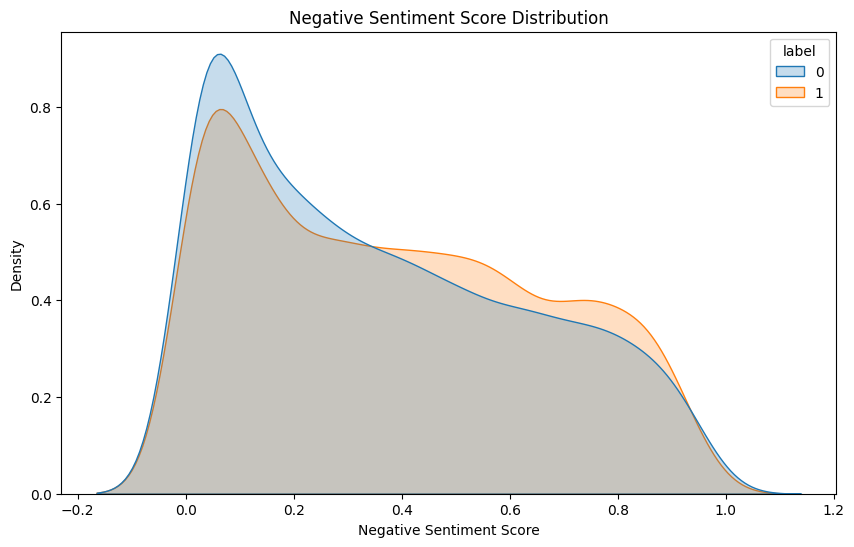

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='negative_score', hue='label', fill=True)
plt.title('Negative Sentiment Score Distribution')
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Density')
plt.show()

In [28]:


import numpy as np
from scipy.sparse import hstack
X_sentiment = df['negative_score'].values.reshape(-1, 1)
# X_neu = df['neutral_score'].values.reshape(-1, 1)
X_pos = df['positive_score'].values.reshape(-1, 1)
X_text = df['combined_text']

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = tfidf_vectorizer.fit_transform(X_text)\

# Step 3: Horizontally stack the features
from scipy.sparse import csr_matrix
X_sentiment_sparse = csr_matrix(X_sentiment)  # make it compatible with sparse X_text
X_sentiment_sparse_pos = csr_matrix(X_pos)
X = hstack([X_text, X_sentiment_sparse, X_sentiment_sparse_pos])

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# print(f"Training data size: {len(X_train)} samples")
# print(f"Testing data size: {len(X_test)} samples")

KeyError: 'neutral_score'

In [22]:
# # TF-IDF Vectorization
# # We'll use a smaller number of features to speed up SVM training
# tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)

# print(f"Number of features: {X_train_tfidf.shape[1]}")

In [26]:
# Function to train and evaluate a model
def train_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    print(f"Predicting with {model_name}...")
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(report)
    
    # Create confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Real', 'Fake'],
                yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    return {
        'model_name': model_name,
        'train_time': train_time,
        'predict_time': predict_time,
        'accuracy': accuracy,
        'f1_score': f1
    }


Training Logistic Regression...
Predicting with Logistic Regression...

Logistic Regression Results:
Training time: 0.03 seconds
Prediction time: 0.00 seconds
Accuracy: 0.8934
F1 Score: 0.8943

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       634
           1       0.89      0.90      0.89       633

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



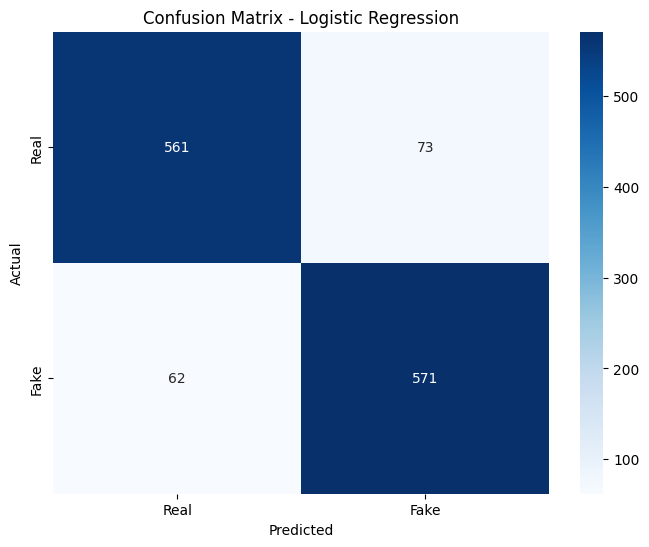


Training Random Forest...
Predicting with Random Forest...

Random Forest Results:
Training time: 1.84 seconds
Prediction time: 0.02 seconds
Accuracy: 0.9116
F1 Score: 0.9117

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       634
           1       0.91      0.91      0.91       633

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



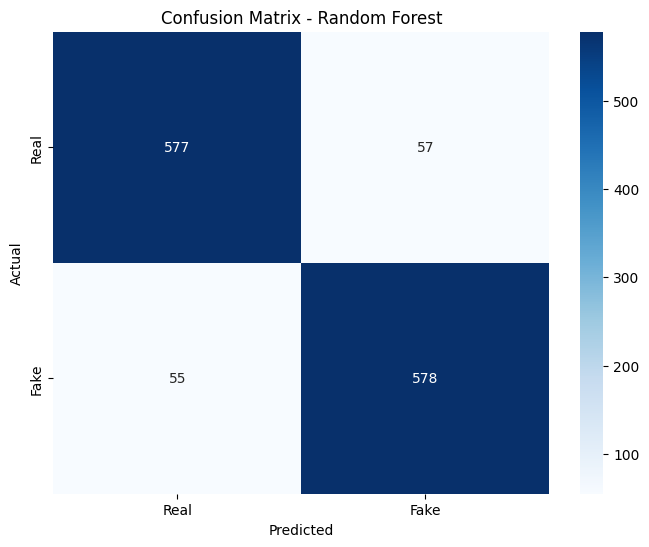


Training Support Vector Machine...
Predicting with Support Vector Machine...

Support Vector Machine Results:
Training time: 46.13 seconds
Prediction time: 1.61 seconds
Accuracy: 0.9195
F1 Score: 0.9203

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       634
           1       0.91      0.93      0.92       633

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



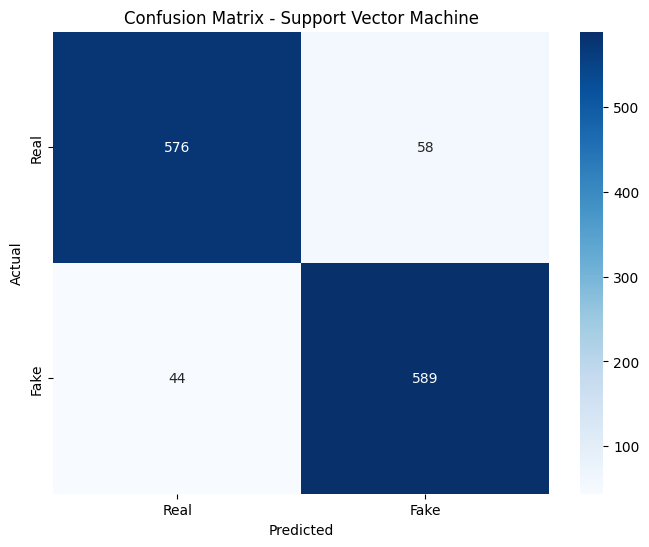

In [27]:
# Initialize models
models = [
    (LogisticRegression(max_iter=1000, C=1.0), "Logistic Regression"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest"),
    (SVC(kernel='rbf', C=10, gamma='scale', probability=True), "Support Vector Machine")
]
# {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
# Train and evaluate each model
results = []

for model, model_name in models:
    result = train_evaluate_model(model, model_name, X_train, y_train, X_test, y_test)
    results.append(result)